In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('file1.csv')
df.head()

,Unnamed: 0,online_order,book_table,rate,votes,cost_for2,rest_type_Cafes,rest_type_Delivery,rest_type_Desserts,rest_type_Dine-out,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,1,4.1,775,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,4.1,787,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,3.8,918,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,3.7,88,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,3.8,166,600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
y=pd.Series(df['rate'])
df.drop(['rate'],inplace=True,axis=1)
X=pd.DataFrame(df)

In [3]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2, booster='gbtree',random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)

y_pred = xgb_reg.predict(x_test) # Predictions

In [5]:
from sklearn.metrics import r2_score,mean_squared_error
r_square=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r_square,mse)


0.8798462418474083 0.10195415740668987


In [6]:
parameters ={'max_depth': [3,5,7,9,15,30,50,100],
     #'criterion' : ['entropy'],
     
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600],
     'learning_rate':[0.03,0.05,0.09,0.1,0.15]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

12000

In [7]:

 #Import the model we are using

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
xgb=GradientBoostingRegressor()
xgb.get_params().keys() #to see available parameters with their name


dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [12]:
rand_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rand_xgb.get_params()
rand_xgb.fit(x_train,y_train)
# Train the model on training data
#rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.09, 0.1,
                                                          0.15],
                                        'max_depth': [3, 5, 7, 9, 15, 30, 50,
                                                      100],
                                        'max_features': [0.3, 0.5, 0.7, 0.9],
                                        'min_samples_leaf': [3, 5, 7, 10, 15],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400,
                                                         600]},
                   verbose=2)

In [13]:
rand_xgb.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 0.9,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'ls',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingRegressor(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'max_depth': [3, 5, 7, 9, 15, 30, 50, 100],
  'max_features': [0.3, 0.5, 0.7, 0.9],
  'min_samples_leaf': [3, 5, 7, 10, 15],
  'min

In [14]:

y_pred = rand_xgb.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
r_square=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r_square,mse)

0.9209705499689109 0.06705891777435011


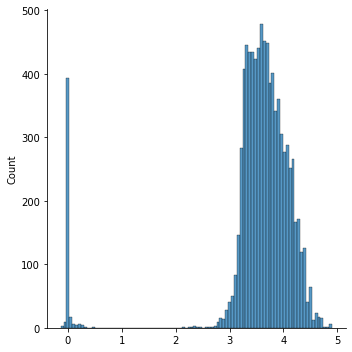

In [15]:
import seaborn as sns
sns.displot(y_pred)